# Banka Kampanya Pazarlama Modeli

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df=pd.read_csv("data/Bank.csv")

In [129]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [130]:
#Değişken türlerini görelim

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [131]:
#Hede değişkeni 1-0 formatına getirdim
df['deposit']=df['deposit'].map({'yes':1,'no':0})
df=df.drop('duration',axis=1)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,1


In [132]:
#kategorik değişkenleri encoderlarım

categorical_features=['job','marital','education','default','housing','loan','contact','month','poutcome']
for col in categorical_features:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,2,-1,0,3,1


In [133]:
#Girdi ve hedef değişken ayrılması

X=df.drop('deposit',axis=1)
y=df['deposit']

X_train,X_test,y_train,y_test=train_test_split(
    X,y,
    test_size=0.2,
    random_state=42
)

#Sayısal değişkenleri scalerladım
scaler=StandardScaler()
numerical_cols=['age','balance','day','campaign','pdays','previous']
X_train[numerical_cols]=scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols]=scaler.transform(X_test[numerical_cols])


Model Eğitimi ve Karşılaştırması

Model: Logistic Regression (LR) | Accuracy: 0.6721898790864308


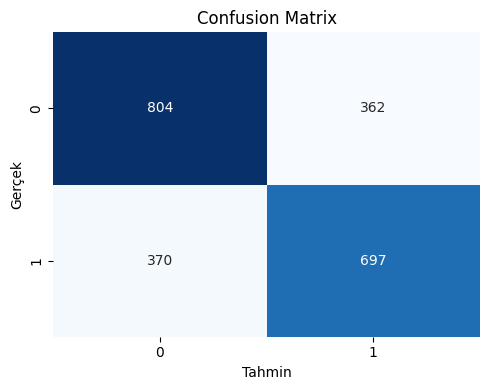

---------------------------
Model: Decision Tree | Accuracy: 0.6274070756829377


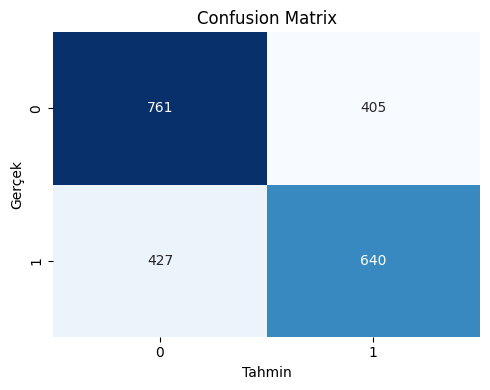

---------------------------
Model: Random Forest | Accuracy: 0.7277205553067622


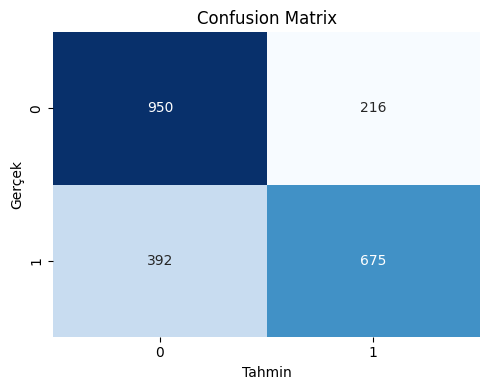

---------------------------
Model: KNeighborsClassifier | Accuracy: 0.6730855351545006


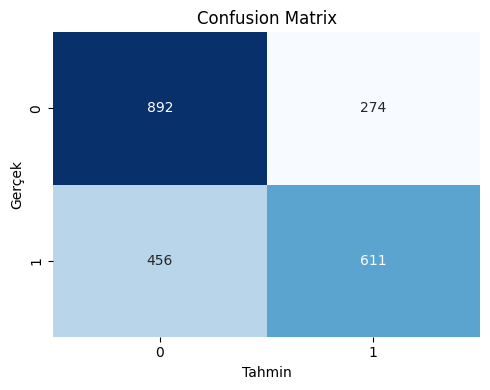

---------------------------


In [134]:
#Modellern eğitimi ve karşılaştırması

models={
    'Logistic Regression (LR)': LogisticRegression(solver='liblinear', random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier()
}

results={}

print("Model Eğitimi ve Karşılaştırması\n")

for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    print(f"Model: {name} | Accuracy: {acc}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Tahmin")
    plt.ylabel("Gerçek")
    plt.tight_layout()
    plt.show()
    print("---------------------------")

*En iyi sonucu Random Forest algoritması verdi. Şimdi Random Foresta hiperparametre optimizasyonu yapalım.*

In [135]:
param_grid={
    'n_estimators':[100,200,300,500,1000],
    'max_depth':[None,5,10,20,30],
    'min_samples_split':[2,5,10]
}
rf=RandomForestClassifier(random_state=42)
rf_grid=GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
rf_grid.fit(X_train,y_train)
print("En iyi parametreler:", rf_grid.best_params_)
print("En iyi skor:", rf_grid.best_score_)

En iyi parametreler: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 1000}
En iyi skor: 0.7261714360996359


Accuracy: 0.728616211374832


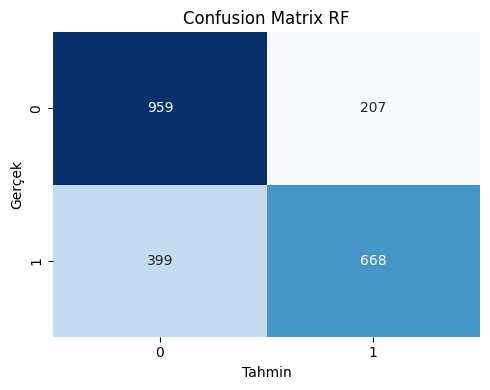

In [136]:
best_model=RandomForestClassifier(
    max_depth=20,
    min_samples_split=2,
    n_estimators=500
)
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy: {acc}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix RF")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.tight_layout()
plt.show()

*Optimizasyon sonucu 1 puan arttırdık.*

In [137]:
importances = best_model.feature_importances_
feature_names = X.columns

fi = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(fi)

      Feature  Importance
5     balance    0.165630
0         age    0.148065
9         day    0.126602
10      month    0.102753
1         job    0.072957
11   campaign    0.066855
8     contact    0.056962
12      pdays    0.056069
14   poutcome    0.043179
3   education    0.039952
6     housing    0.033511
2     marital    0.033207
13   previous    0.032709
7        loan    0.017751
4     default    0.003798


*Benim 'analiz.ipynb' dosyasında belirttiğim gibi etkili olan değişkenlere benzer sonucu modelde verdi.*